# Section 5.2

In [326]:
import numpy as np
from tabulate import tabulate
import os
from matplotlib import pyplot as plt

In [413]:
#data import
v_sample = 62.5 / 2
v_sig = np.arange(.1, 1.1, .1) * v_sample
v_read = np.array(
    [3.125, 6.25, 9.346, 12.5, 15.57, 18.86, 21.93, 25, 28.15, 31.25])
signal_error = np.array([0, 0, 0.05, 0.2, 0.03, 0.06, 0, 0, 0.07, 0])
period = np.array([320, 160, 106, 80, 64, 53.6, 45.6, 40, 35.4, 32])
period_error = np.array([0, 0, 1, 0, 0, 0.6, 0, 0, 0, 0])
voltage = np.array(
    [1.21, 1.29, 1.08, 0.0736, 0.09, 0.0436, 1.28, 1.31, 1.38, 1.5])
voltage_error = np.array([0.01, 0.01, 0.01, 0.01, 2, 2, 0, 0, 0.02, 0.01])

In [414]:
data = np.concatenate(
    (v_sig[np.newaxis], v_read[np.newaxis], signal_error[np.newaxis],
     period[np.newaxis], voltage[np.newaxis]))

In [415]:
print(
    tabulate(data.T,
             headers=('nu  (MHz)', 'nu (on oscil) (MHz)', 'Signal Error (MHz)',
                      'Period (ns)', 'Period Error (ns)',
                      'Voltage (peak to peak) (V)'),
             tablefmt='grid'))

+-------------+-----------------------+----------------------+---------------+---------------------+
|   nu  (MHz) |   nu (on oscil) (MHz) |   Signal Error (MHz) |   Period (ns) |   Period Error (ns) |
+=============+=======================+======================+===============+=====================+
|       3.125 |                 3.125 |                 0    |         320   |              1.21   |
+-------------+-----------------------+----------------------+---------------+---------------------+
|       6.25  |                 6.25  |                 0    |         160   |              1.29   |
+-------------+-----------------------+----------------------+---------------+---------------------+
|       9.375 |                 9.346 |                 0.05 |         106   |              1.08   |
+-------------+-----------------------+----------------------+---------------+---------------------+
|      12.5   |                12.5   |                 0.2  |          80   |             

In [416]:
import glob

In [417]:
#Read in the files from the Lab_1_waveforms folder
samples = 16000
path = '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/Lab_1_waveforms/'
files = sorted(glob.glob(path + '*'))
data_5v = [np.load(file)['arr_0'][:samples] for file in files]

path = '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/Lab_1_waveforms_2/'
files = sorted(glob.glob(path + '*'))
data_2v = [np.load(file)['arr_0'][:samples] for file in files]

In [445]:
# normalize to propper voltages
voltage = np.array(
    [1.21, 1.29, 1.08, 0.0736, 0.09, 0.0436, 1.28, 1.31, 1.38, 1.5])
for i, volt in zip(np.arange(0, len(data_2v)), voltage):
    data_2v[i] = data_2v[i] / data_2v[i].max() * (volt / 2)
    data_5v[i] = data_5v[i] / data_5v[i].max() * (volt / 2)

In [449]:
data_2v[0].min()

-0.5894871794871794

In [419]:
#Set up the times from the sampler
times = np.linspace(0, samples / (v_sample * 1e6), samples)

<IPython.core.display.Javascript object>


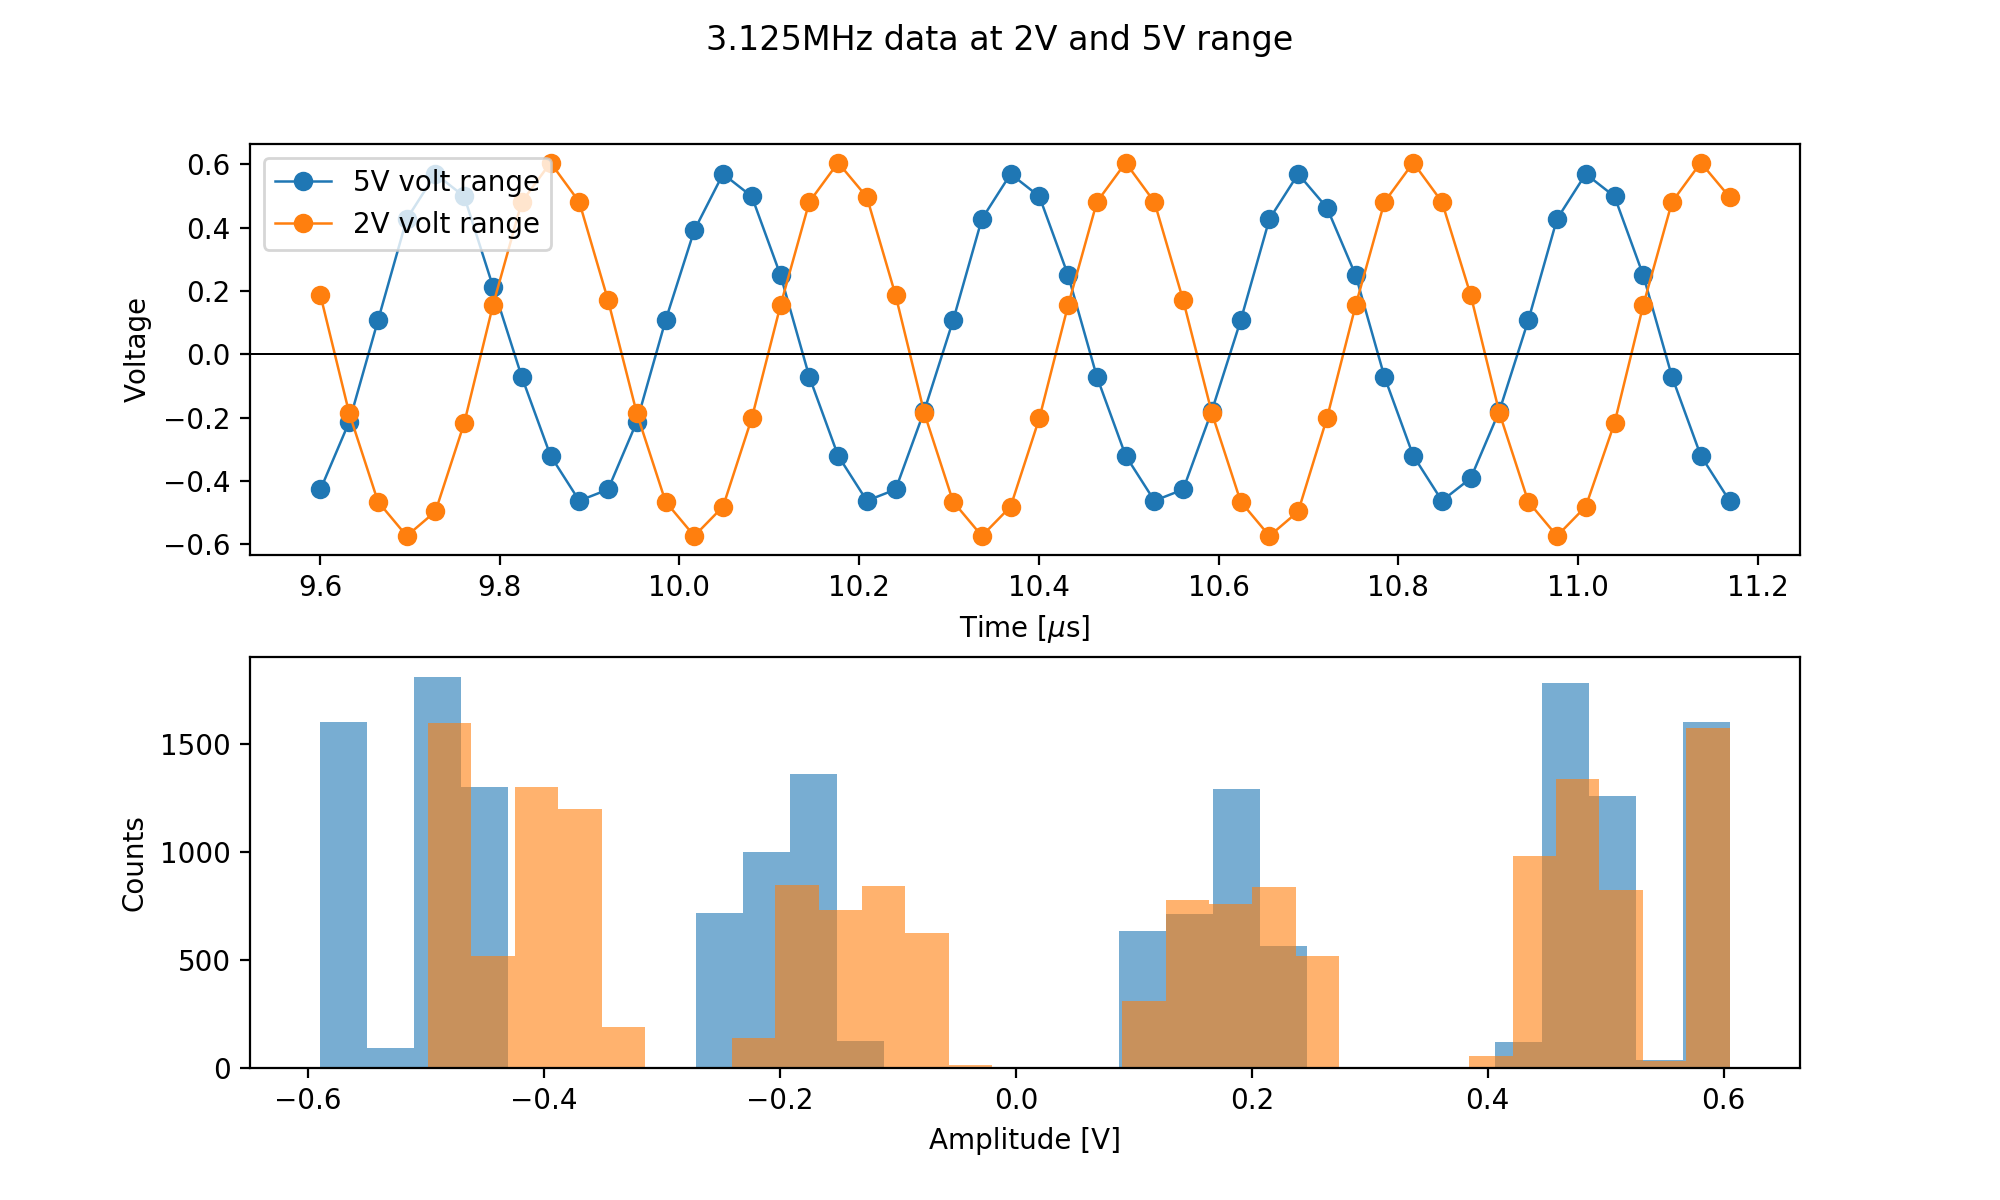

<ipython-input-444-10b2f58cb246>:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [444]:
plot = 0
fig, (ax1, ax2) = plt.subplots(nrows=2,
                               gridspec_kw={
                                   'hspace': .25,
                                   'wspace': .45
                               },
                               figsize=(10, 6))
plt.suptitle(str(v_sig[plot])+'MHz data at 2V and 5V range')
ax1.plot(times[300:350] * 1e6, data_5v[plot][300:350], 'o-', lw=.9, alpha=1, label='5V volt range')
ax1.set_xlabel('Time [$\mu$s]')
ax1.axhline(color='k', lw=.7)
ax1.set_ylabel('Voltage')
ax1.plot(times[300:350] * 1e6, data_2v[plot][300:350], 'o-', lw=.9, alpha=1, label='2V volt range')
ax1.axhline(color='k', lw=.7)

ax2.hist(data_2v[plot], bins=30, alpha=.6)
ax2.hist(data_5v[plot], bins=30, alpha=.6)
ax2.set_xlabel('Amplitude [V]')
ax2.set_ylabel('Counts')
ax1.legend()
plt.tight_layout()

In [450]:
#Find the period
def avg_period(data, times, nsamples=16000):
    """
    Find the average period of a sampled wave form in ns
    """
    peak = []
    for i in range(nsamples - 1):
        if data[i - 1] < data[i] and data[i + 1] < data[i]:
            peak.append(times[i])
    T = []
    for i in range(len(peak) - 1):
        T.append(peak[i + 1] - peak[i])
    return np.asarray(np.mean(T)) * 1e9


periods_2v = np.array(
    [avg_period(dat, times, nsamples=samples) for dat in data_2v])
periods_5v = np.array(
    [avg_period(dat, times, nsamples=samples) for dat in data_5v])

In [451]:
periods = np.concatenate(
    (periods_2v[np.newaxis], periods_5v[np.newaxis], period[np.newaxis]))
print(
    tabulate(periods.T,
             headers=('2V volt range periods', '5V volt range periods',
                      'Scope Periods'),
             tablefmt='grid'))

+-------------------------+-------------------------+-----------------+
|   2V volt range periods |   5V volt range periods |   Scope Periods |
+=========================+=========================+=================+
|                320.02   |                320      |           320   |
+-------------------------+-------------------------+-----------------+
|                168.59   |                160.01   |           160   |
+-------------------------+-------------------------+-----------------+
|                108.484  |                107.205  |           106   |
+-------------------------+-------------------------+-----------------+
|                 80.2232 |                 85.7999 |            80   |
+-------------------------+-------------------------+-----------------+
|                 64.004  |                 64.2369 |            64   |
+-------------------------+-------------------------+-----------------+
|                 80.198  |                 80.1855 |           

In [452]:
# power spectrum
E_2v = [np.fft.fft(dat) for dat in data_2v]
power_2v = [np.abs(e)**2 for e in E_2v]
E_5v = [np.fft.fft(dat) for dat in data_5v]
power_5v = [np.abs(e)**2 for e in E_5v]
freqs = np.fft.fftfreq(len(times), np.median(np.diff(times)))

In [453]:
%matplotlib notebook

<IPython.core.display.Javascript object>


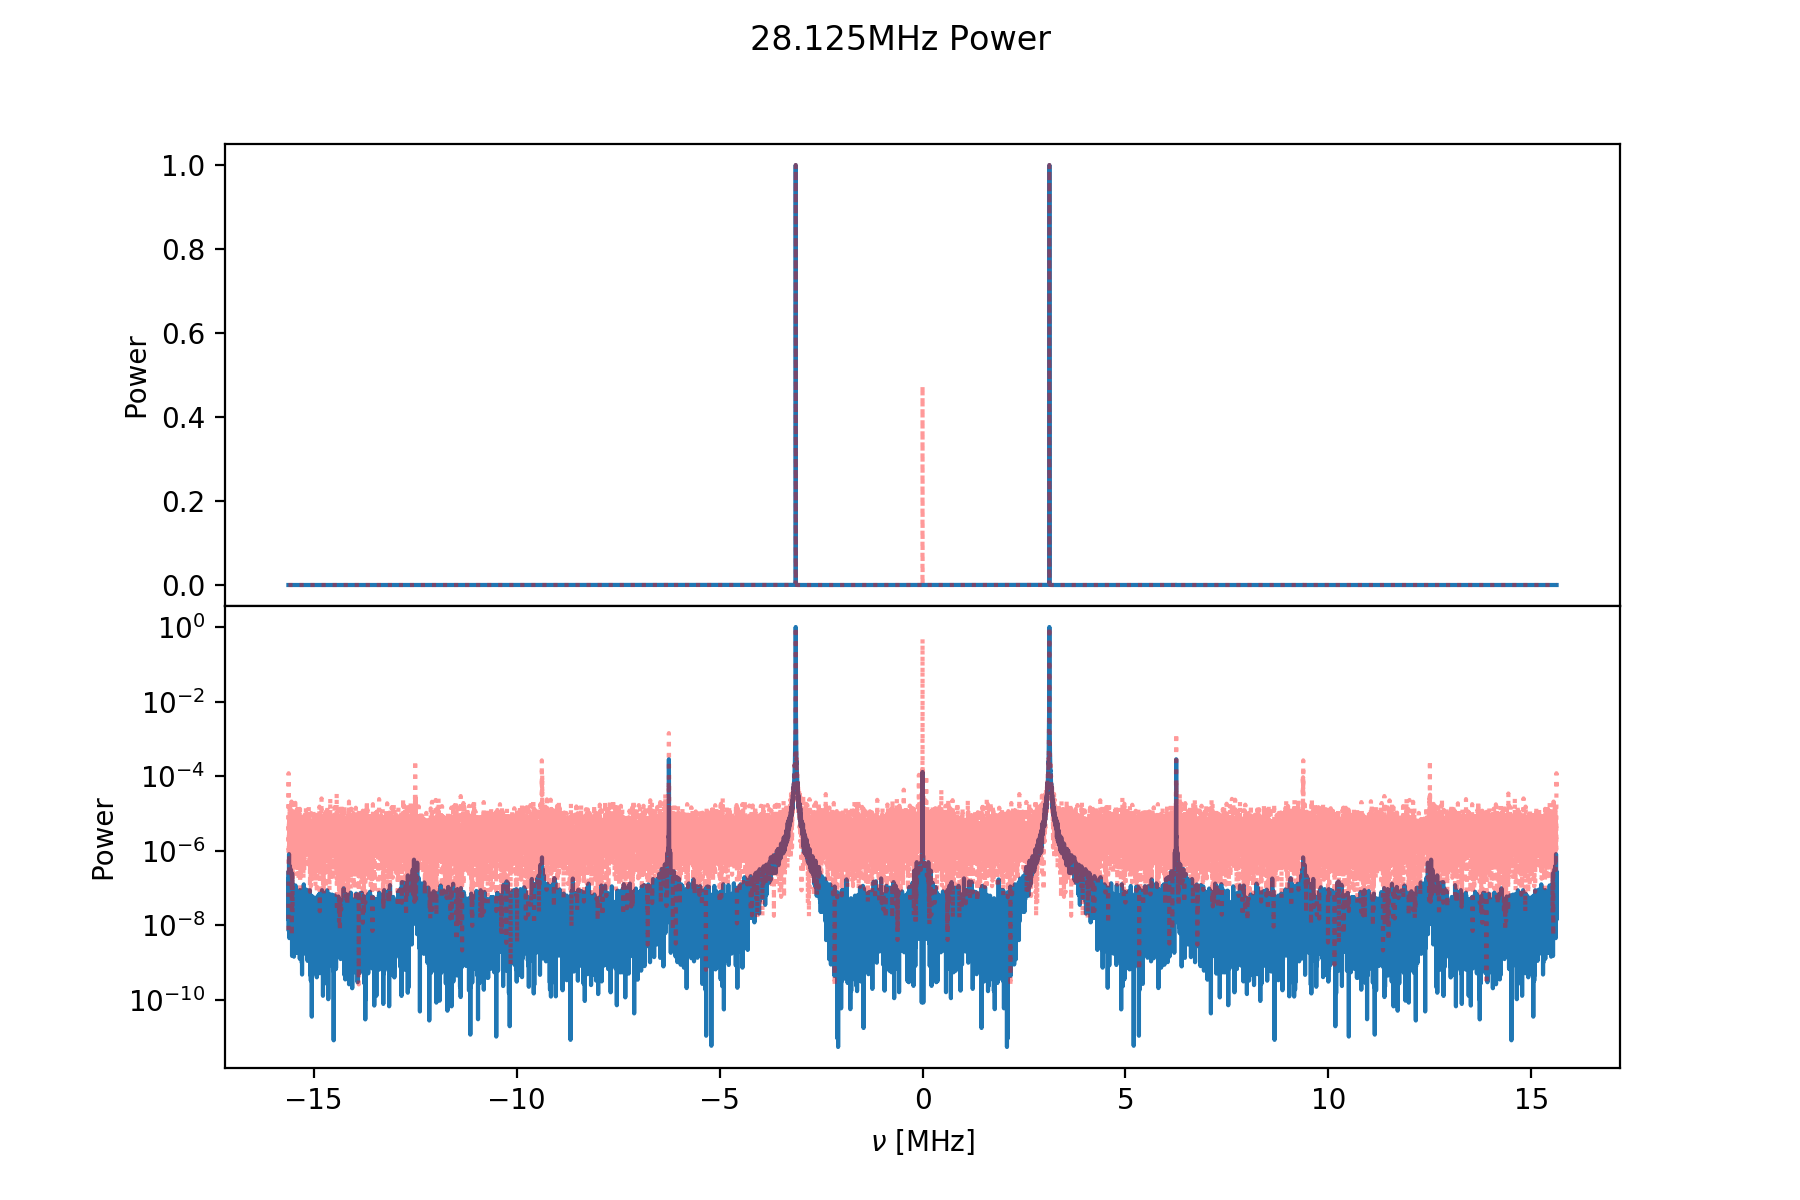

Text(0, 0.5, 'Power')

In [454]:
plot = 8
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'hspace':0}, figsize=(9,6))
plt.suptitle(str(v_sig[plot]) + 'MHz Power')
ax1.plot(
    np.fft.fftshift(freqs) / 1e6,
    np.fft.fftshift(power_2v[plot] / power_2v[plot].max()))
ax1.plot(np.fft.fftshift(freqs)/1e6, np.fft.fftshift(power_5v[plot]/power_5v[plot].max()), ':r', alpha=.4)
ax1.set_xlabel(r'$\nu$' + ' [MHz]')
ax1.set_ylabel('Power')
ax2.semilogy(
    np.fft.fftshift(freqs) / 1e6,
    np.fft.fftshift(power_2v[plot] / power_2v[plot].max()))
ax2.semilogy(np.fft.fftshift(freqs)/1e6, np.fft.fftshift(power_5v[plot]/power_5v[plot].max()), ':r', alpha=.4)
ax2.set_xlabel(r'$\nu$' + ' [MHz]')
ax2.set_ylabel('Power')


# 5.3 Voltage Spectra and Power Spectra

<IPython.core.display.Javascript object>


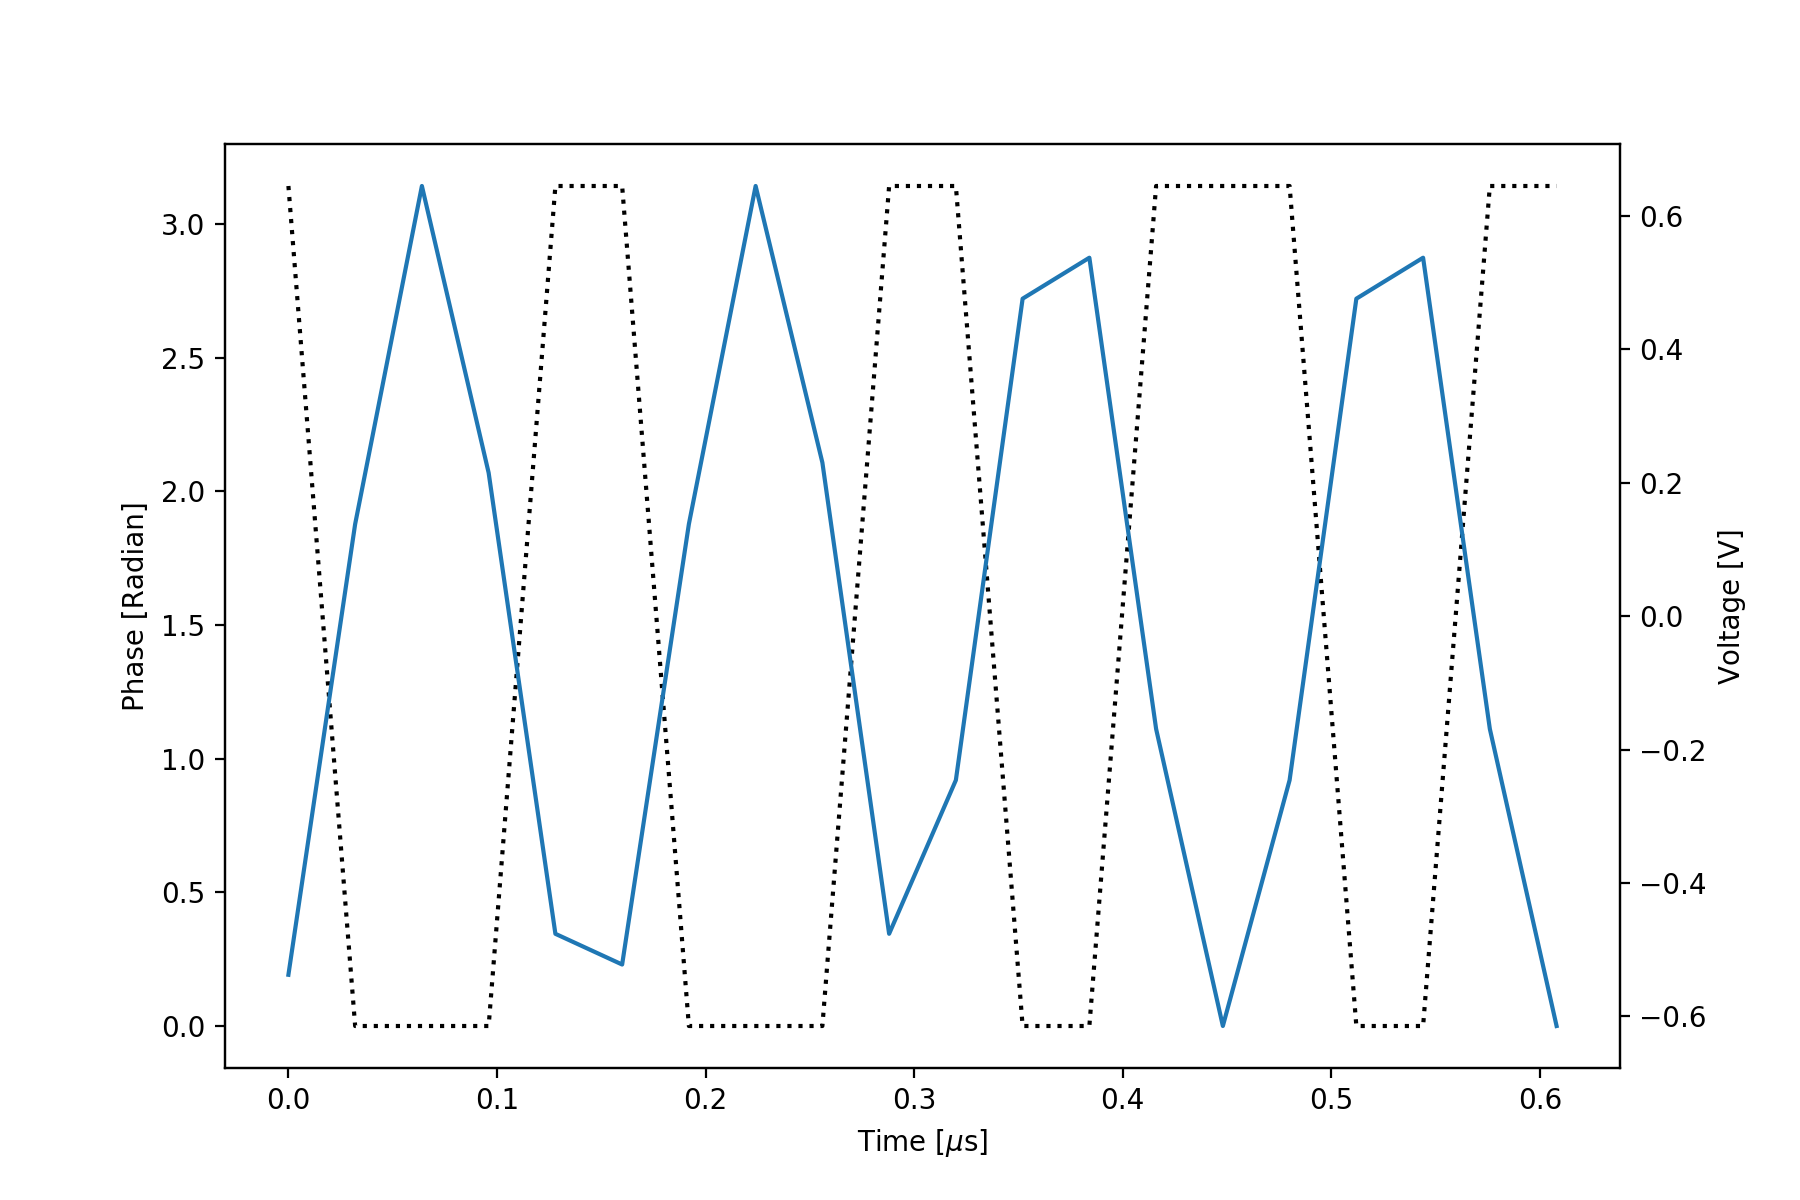

Text(0, 0.5, 'Voltage [V]')

In [455]:
#Plot the real and imaginary portions
plt.figure(figsize=(9,6))
# plt.plot(np.fft.fftshift(freqs), np.real(np.fft.fftshift(np.abs(np.fft.fft(data[0])))), '--k', lw=.8)
plt.plot(times[:20]*1e6, np.angle(data_2v[1][:20]), ':k', label='imaginary')
plt.ylabel('Phase [Radian]')
plt.xlabel(r'Time [$\mu$s]')
plt.twinx()
plt.plot(times[:20]*1e6,np.real(data_2v[1][:20]), label='real')
plt.ylabel('Voltage [V]')


In [456]:
from scipy import correlate

In [457]:
# Auto correlation
ftpower = [np.fft.ifft(p) for p in power_2v]
ac = [np.fft.fft(dat) * np.conj(np.fft.fft(dat)) for dat in data_2v]
nac = [np.correlate(p, p, mode='same') for p in power_2v]
sac = [correlate(p, p, mode='same') for p in power_2v]

<ipython-input-457-93ae49fbc925>:5: DeprecationWarning: scipy.correlate is deprecated and will be removed in SciPy 2.0.0, use numpy.correlate instead
  sac = [correlate(p, p, mode='same') for p in power_2v]


<IPython.core.display.Javascript object>


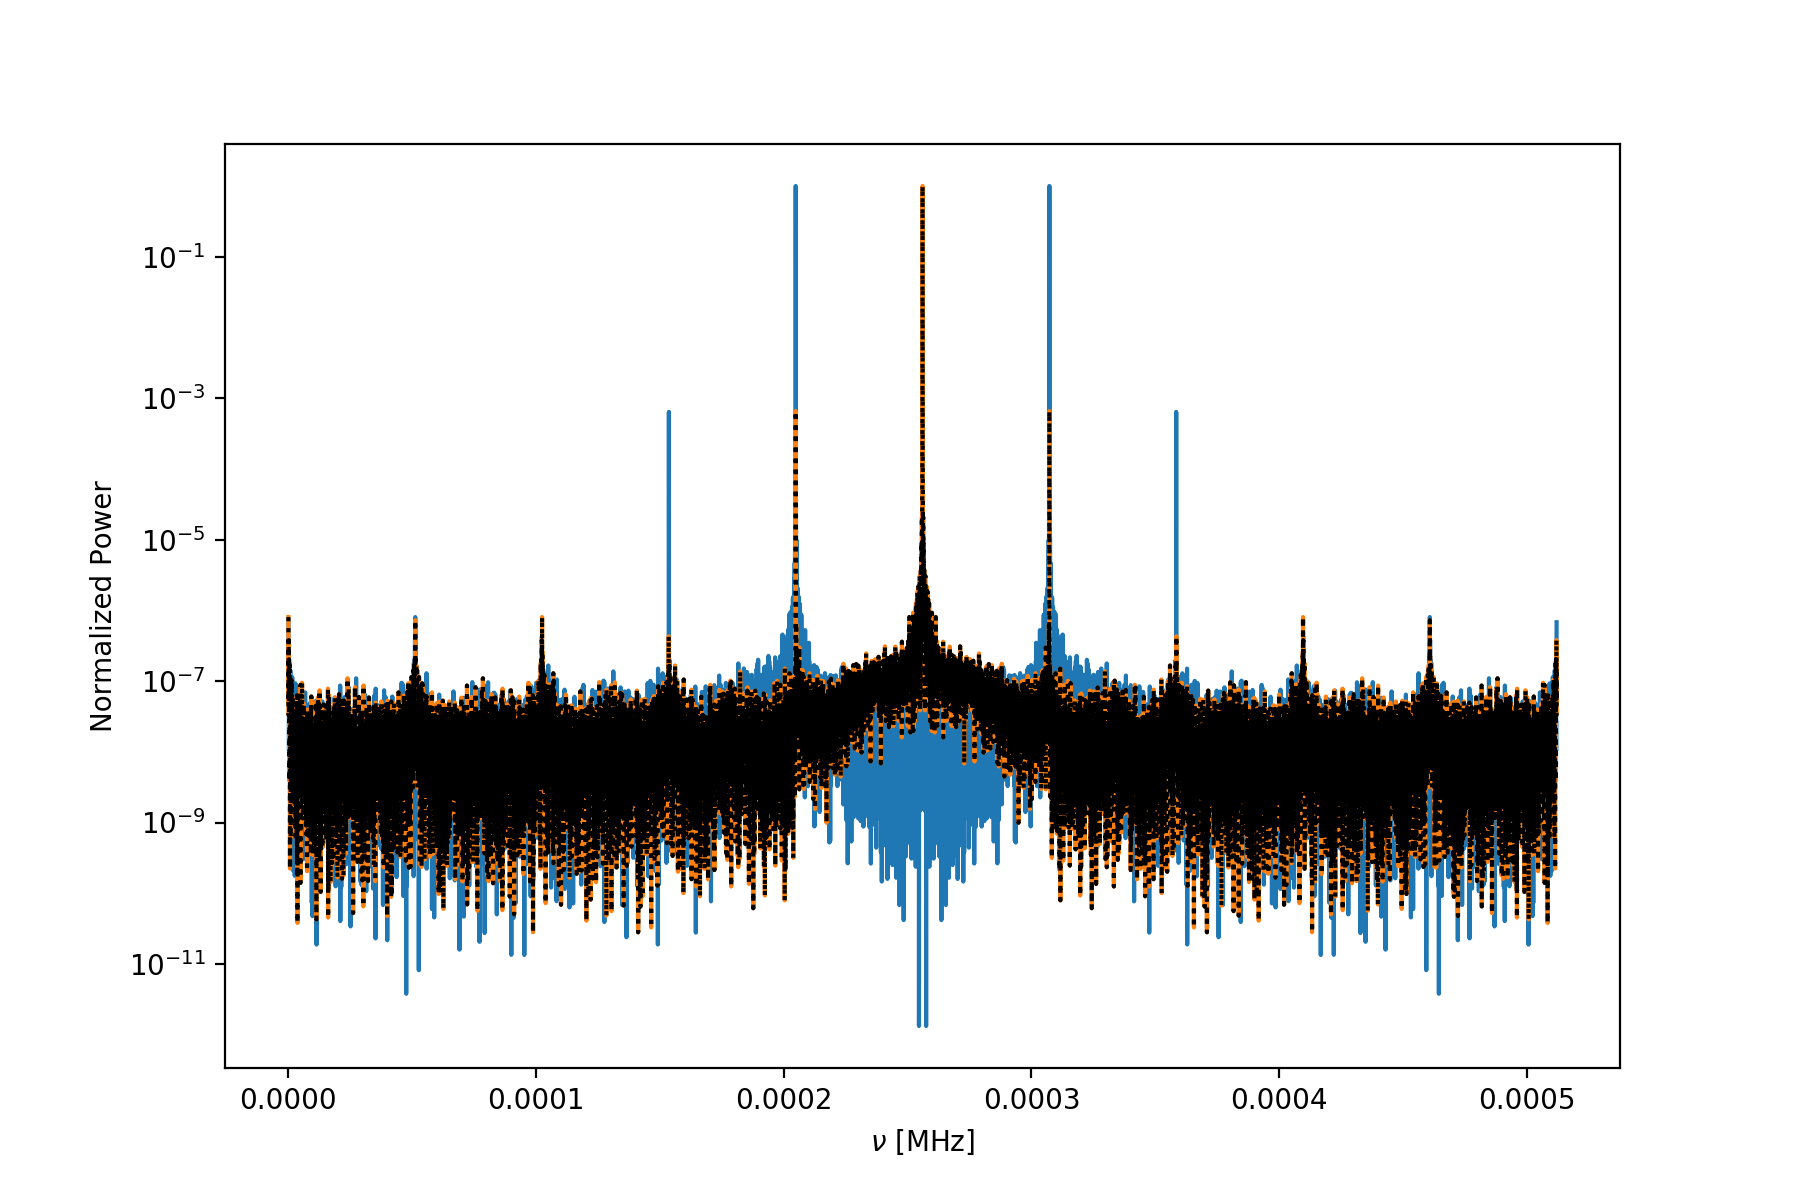

/Users/maxlee/anaconda3/envs/radio_lab/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Normalized Power')

In [458]:
plt.figure(figsize=(9,6))
# plt.plot(times, ftpower[0]/ftpower[0].max())
plt.semilogy(times, np.fft.fftshift(ac[0] / ac[0].max()))
plt.semilogy(times, nac[0] / nac[0].max())
plt.semilogy(times, sac[0] / sac[0].max(), ':k')
plt.xlabel(r'$\nu$ [MHz]')
plt.ylabel('Normalized Power')
plt.show()

# 5.4 Leakage Power

In [475]:
v_sample

3.125e+19

In [489]:
N = 16000
v_sample = 31.25e6
times = np.linspace(-N / v_sample, (N / v_sample - 1) / 2, N)
leakage_freqs = [np.linspace(-v_sample / 2, v_sample / 2 * (1 - 2 / (i*N)),i*N) for i in range(1,5)]



In [490]:
leakage_power = [np.abs(dft.dft(data_2v[0], t=times, f=leakage_freqs[i], vsamp=v_sample)[1])**2 
                 for i in range(0,4)]

<IPython.core.display.Javascript object>


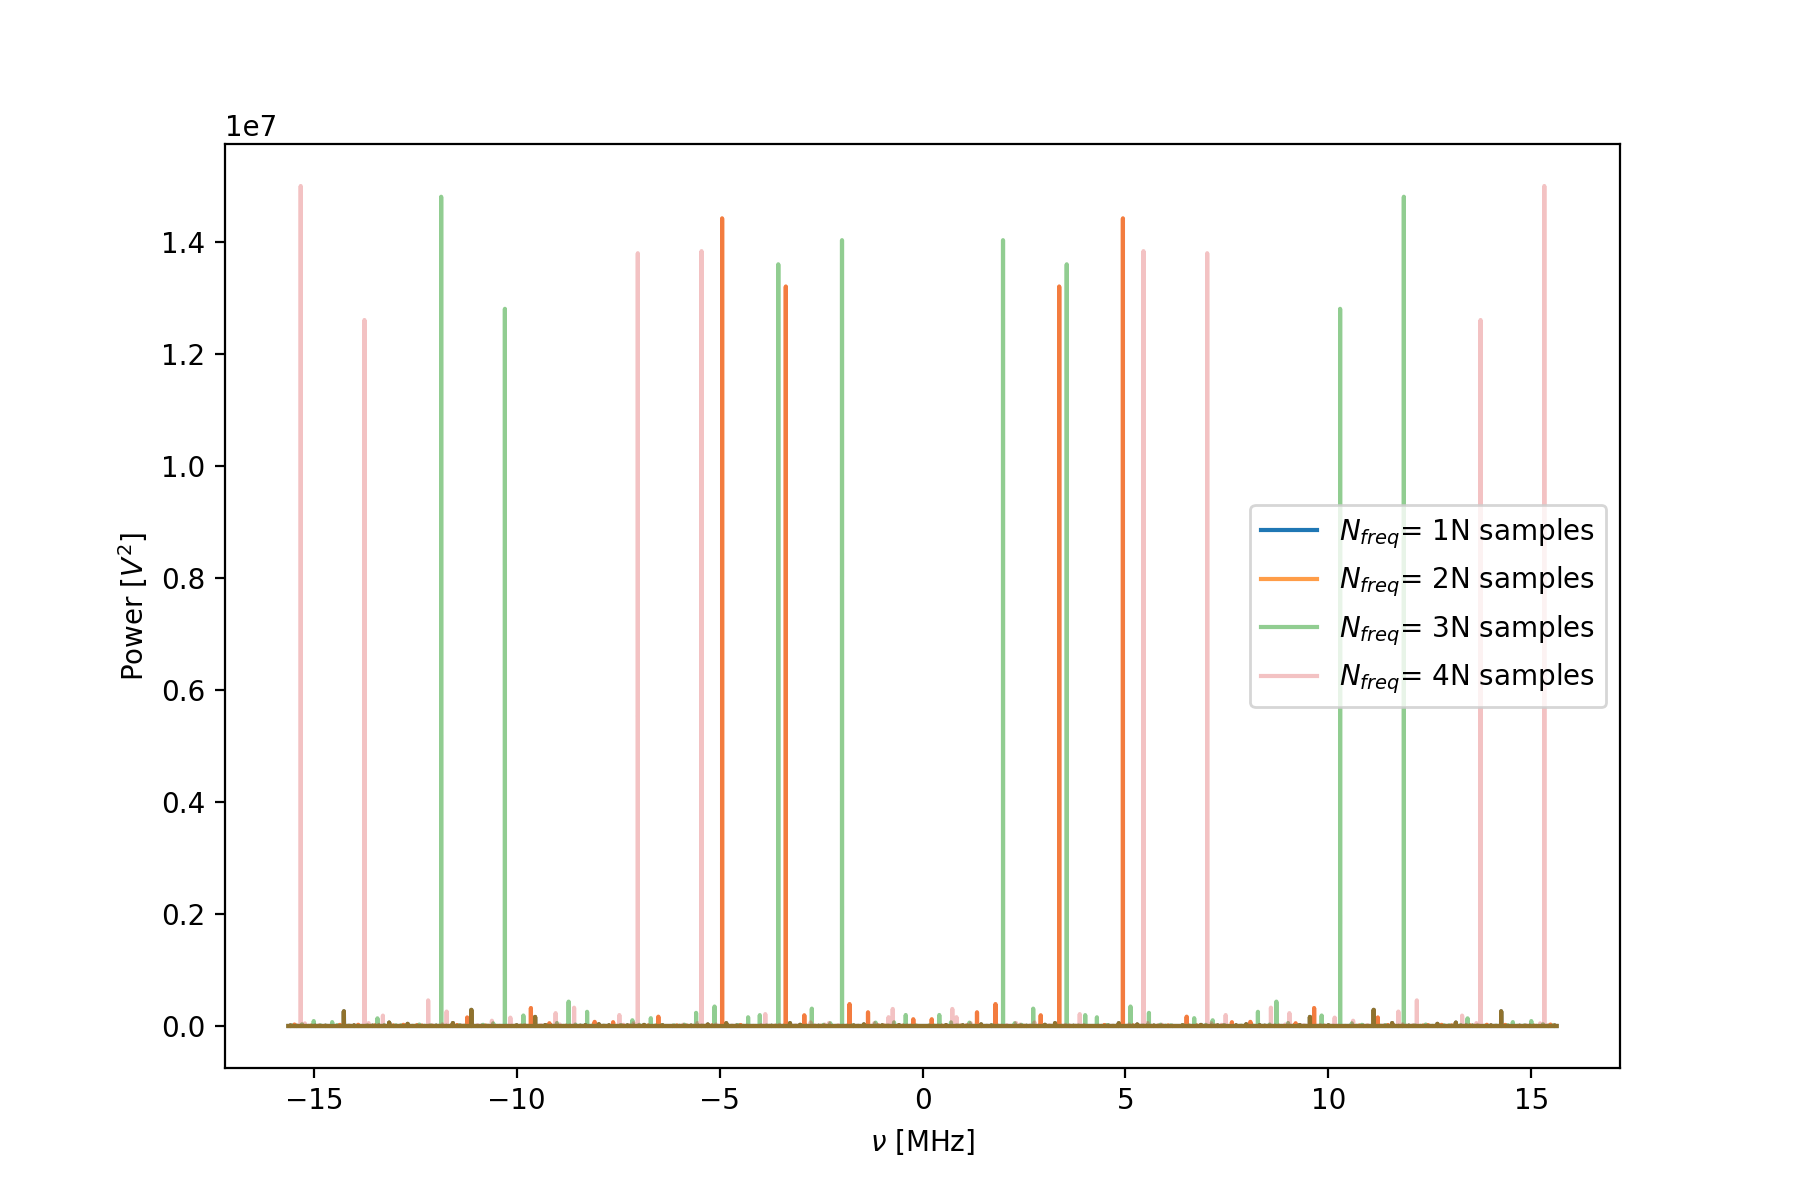

In [517]:
plt.figure(figsize=(9,6))
for i in range(4):
    plt.plot(leakage_freqs[i]/1e6, leakage_power[i], label='$N_{freq}$= '+str(i+1)+'N samples', alpha=1-.24*i)
plt.legend()
plt.xlabel(r'$\nu$ [MHz]')
plt.ylabel('Power [$V^2$]')
# plt.xlim(1e-1, 20)
plt.show()

# Frequency Resolution

In [396]:
path = '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/Lab_1_freq_res/'
fr_files = [file for file in sorted(glob.glob(path + '*'))]
fr_data = [np.load(file)['arr_0'] for file in fr_files]
widths = [
    r'$\Delta\nu$=.003MHz', r'$\Delta\nu$=.005MHz', r'$\Delta\nu$=.05MHz',
    r'$\Delta\nu$=.1MHz', r'$\Delta\nu$=.15MHz', r'$\Delta\nu$=2MHz'
]

In [397]:
fr_power = [np.abs(np.fft.fft(dat))**2 for dat in fr_data]

<IPython.core.display.Javascript object>


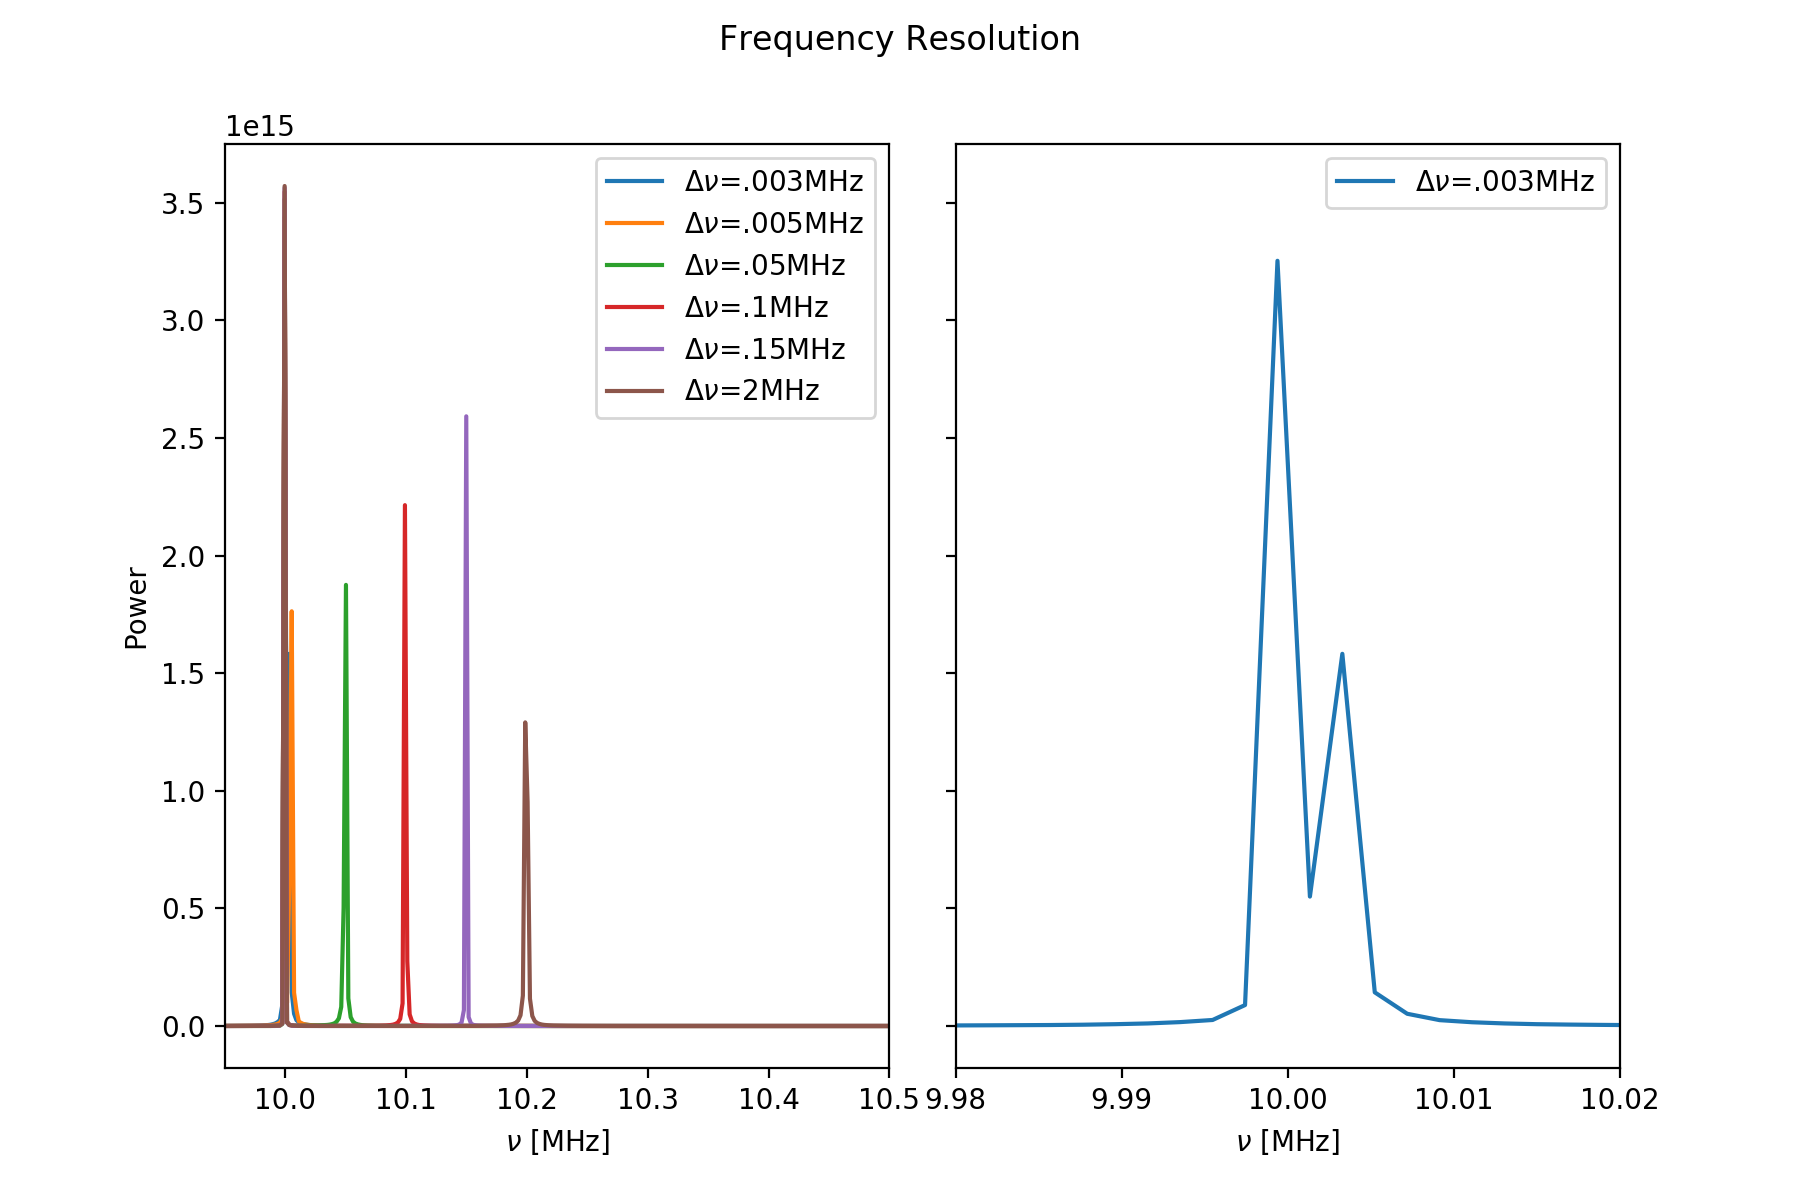

<ipython-input-398-d4107a4a10f7>:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [398]:
fig, axs = plt.subplots(ncols=2,
                        sharey=True,
                        gridspec_kw={'wspace': .1},
                        figsize=(9, 6))
plt.suptitle('Frequency Resolution')
for p, width in zip(fr_power, widths):
    axs[0].plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(p), label=width)
axs[0].set_xlim(.995e1, 1.05e1)
axs[0].legend()
axs[1].plot(np.fft.fftshift(freqs/1e6),
            np.fft.fftshift(fr_power[0]),
            label=widths[0])
axs[1].set_xlim(.998e1, 1.002e1)
axs[0].set_xlabel(r'$\nu$ [MHz]')
axs[1].set_xlabel(r'$\nu$ [MHz]')
axs[0].set_ylabel(r'Power')

axs[1].legend()
plt.tight_layout()

In [352]:
print('What the minimum should be Delta nu: ', 31.25e6 / (16000), 'Hz')

What the minimum should be Delta nu:  1953.125 Hz


# 5.6 Nyquist Window

In [353]:
import dft

In [355]:
N = 16000
v_sample *= 1e6
times = np.linspace(-N / v_sample, (N / v_sample - 1) / 2, N)
window_freqs = [
    np.linspace(-i * v_sample / 2, i * v_sample / 2 * (1 - 2 / N), N)
    for i in np.arange(4, 8)
]

In [356]:
v_sample

31250000.0

In [357]:
nw_power = [
    np.abs(dft.dft(data_2v[0], t=times, f=freq, vsamp=v_sample))**2
    for freq in window_freqs
]

<IPython.core.display.Javascript object>


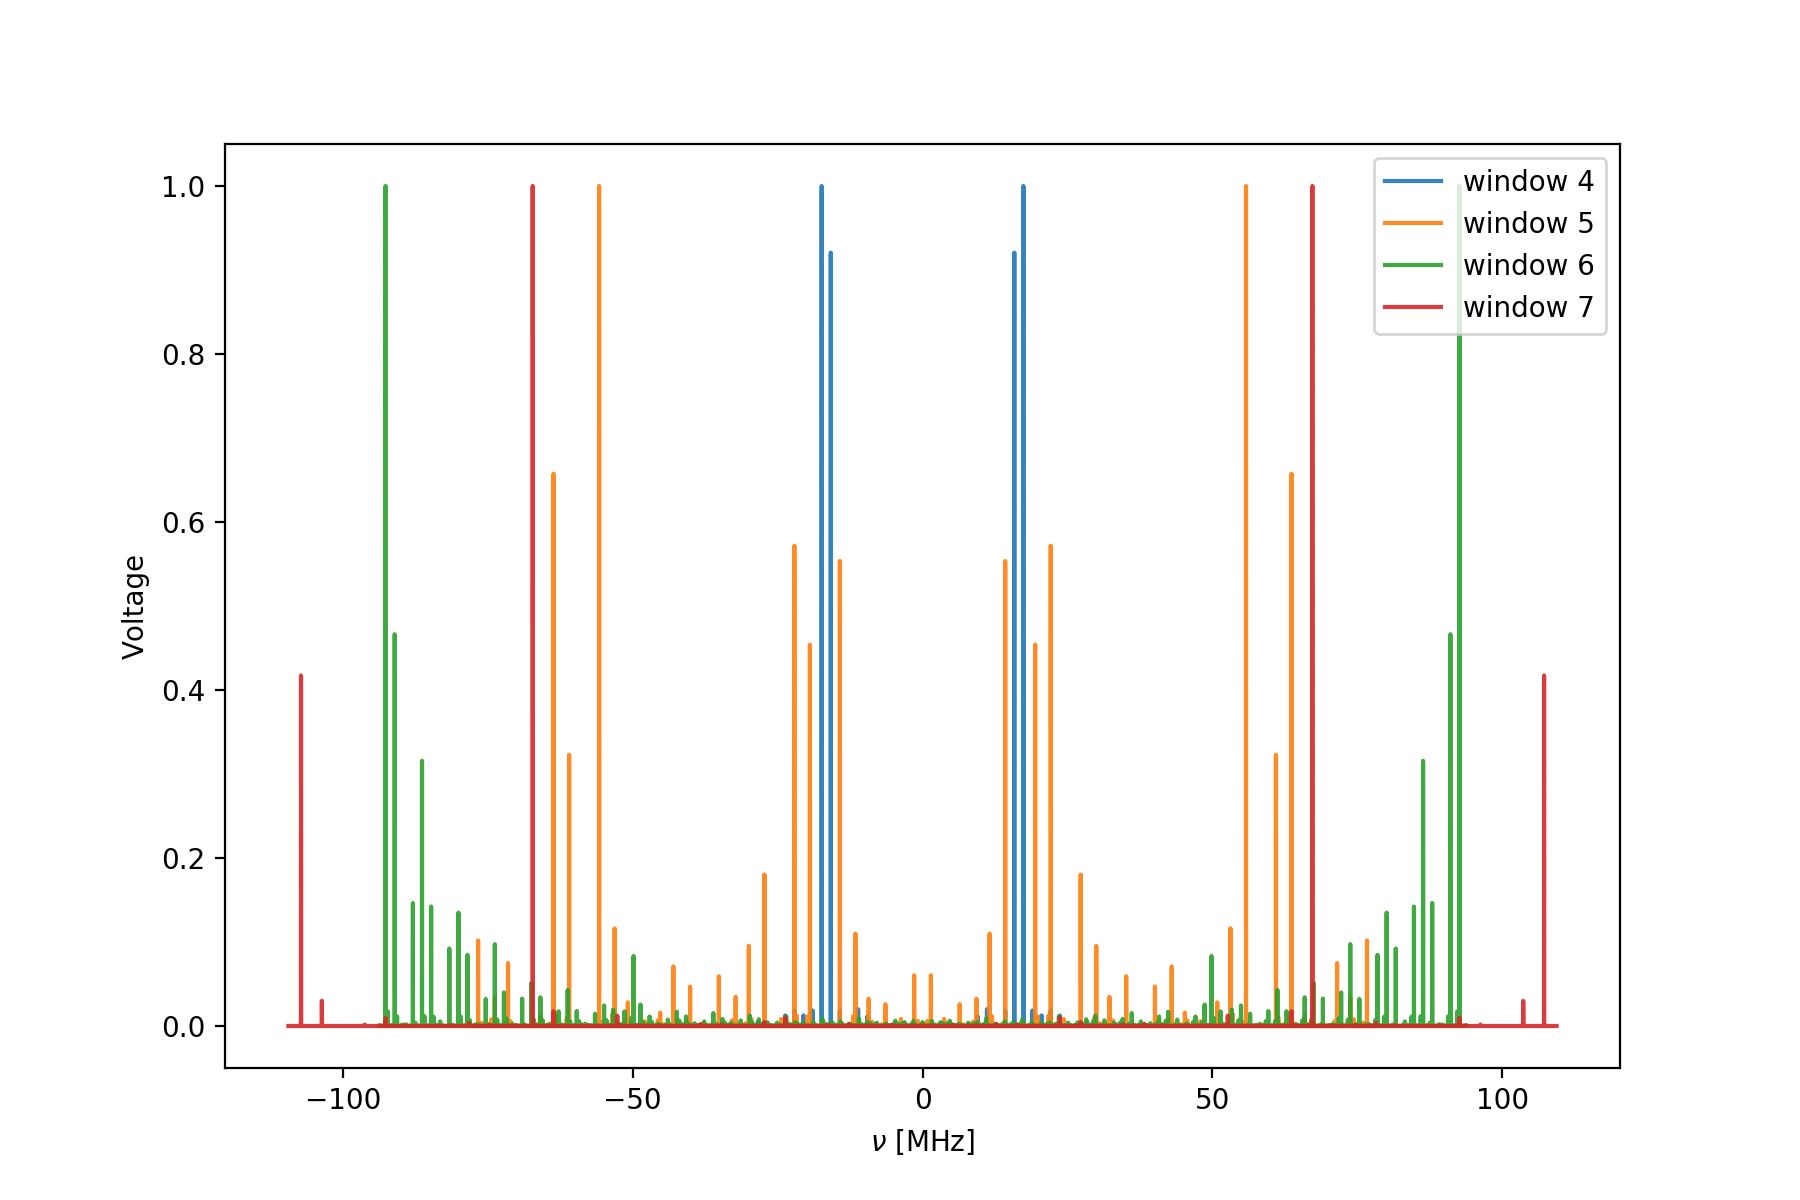

Text(0, 0.5, 'Voltage')

In [392]:
plt.figure(figsize=(9,6))
for p, f, w, in zip(nw_power, window_freqs, np.arange(4, 8)):
    plt.plot(f/1e6, p[1] / p[1].max(), label='window ' + str(w), alpha=.9)
plt.legend()
plt.xlabel(r'$\nu$ [MHz]')
plt.ylabel('Voltage')

# 5.7 Noise in Data

TODO
Retake data with a smaller voltage range

In [361]:
path = '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/Lab_1_noise_data/'
files = sorted(glob.glob(path + '*'))
n_data = [np.load(file)['arr_0'] for file in files]
n_data = [dat / dat.max() for dat in n_data]

In [362]:
files

['/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/Lab_1_noise_data/n_wf_32.npz',
 '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/Lab_1_noise_data/n_wf_32_200mv.npz',
 '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/Lab_1_noise_data/noise_data1.npz',
 '/Users/maxlee/Desktop/School/Radio/radio_lab/Lab_1/Lab_1_noise_data/noise_data_200mv.npz']

* What is the mean voltage over this sample? 
* What is the variance? 
* The standard deviation (which, for a zero-mean signal, is the same as the root-mean-square, or rms)?

In [363]:
print('Mean Voltage: ', round(n_data[3].mean(), 4))
print('Voltage Variance: ', round(n_data[3].var(), 4))
print('Voltage STD: ', round(n_data[3].std(), 4))
print('RMS: ', round(np.sqrt(np.mean(n_data[3]**2)),4))

Mean Voltage:  -0.0007
Voltage Variance:  0.0555
Voltage STD:  0.2356
RMS:  0.2356


<IPython.core.display.Javascript object>


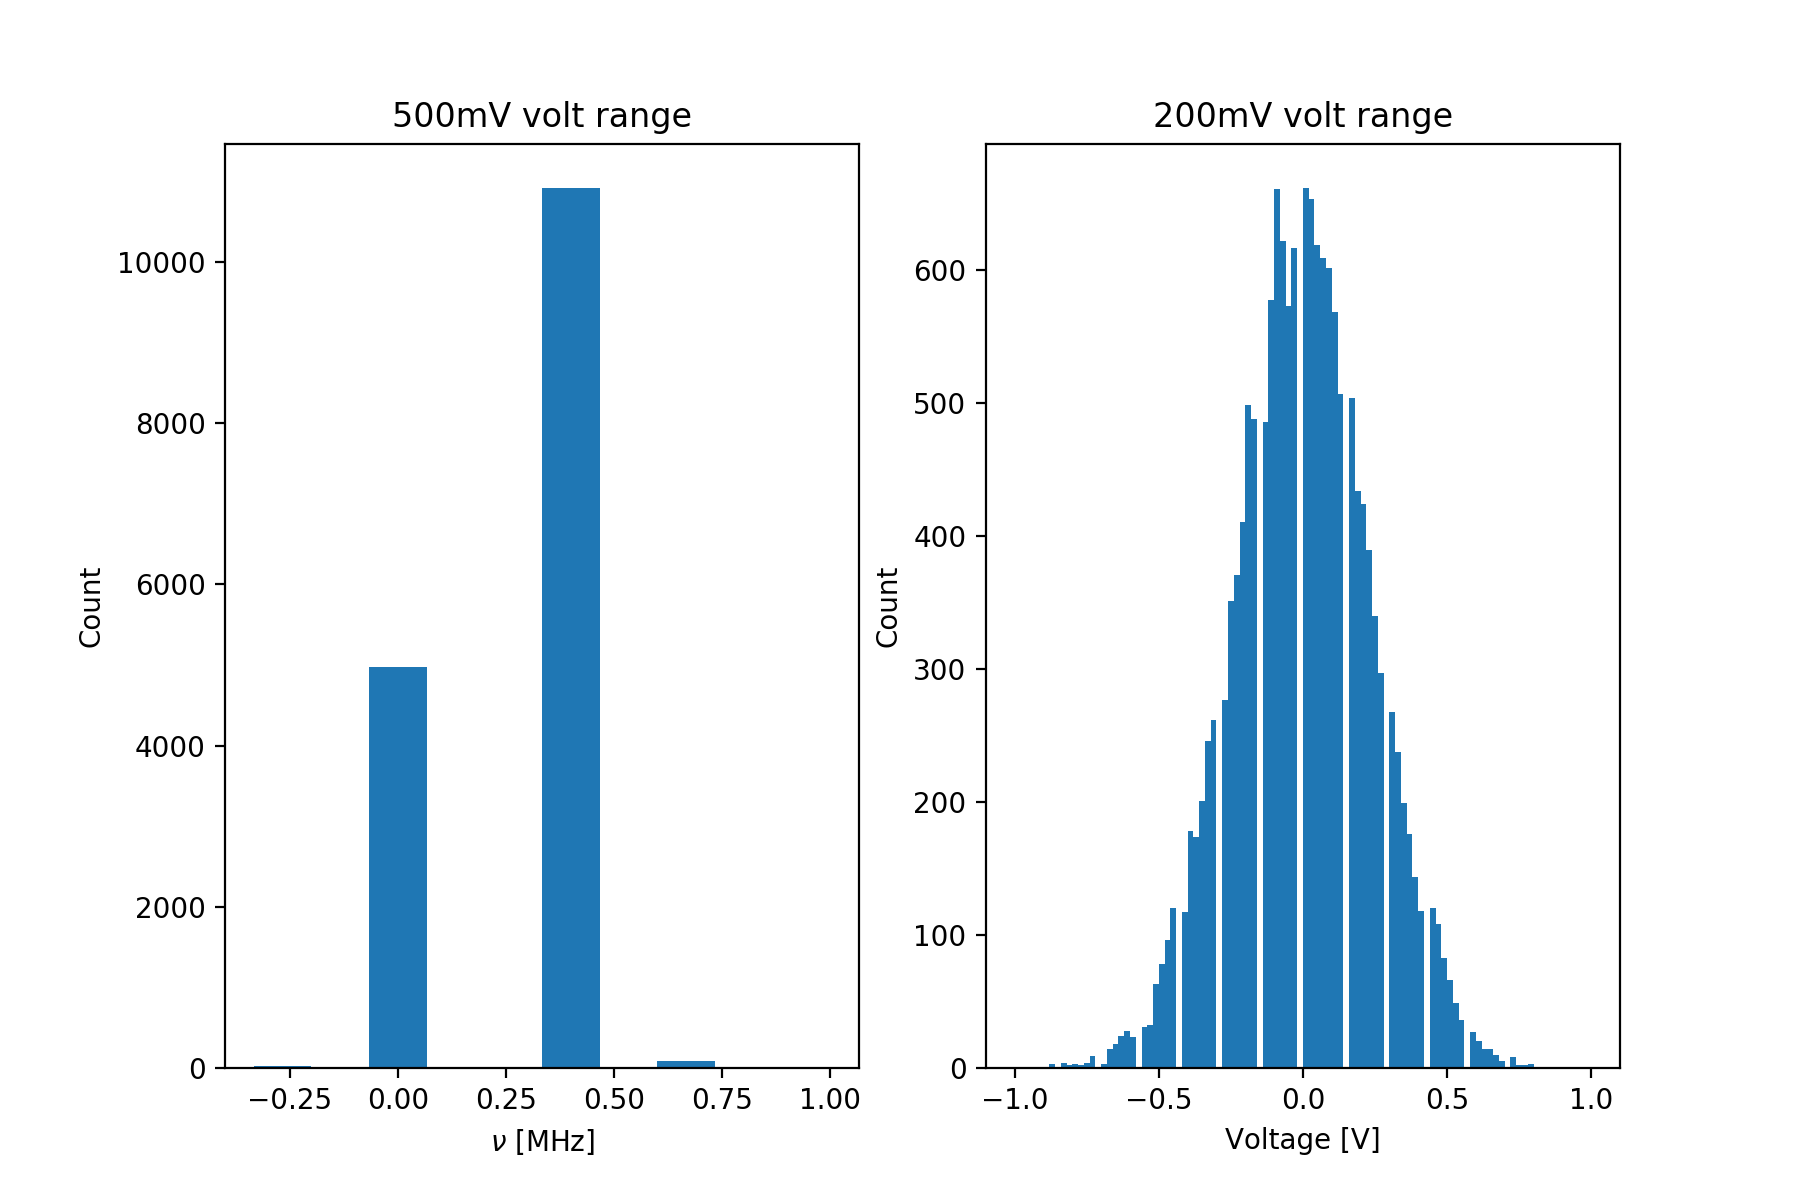

In [389]:
fig, ax = plt.subplots(ncols=2, sharey=False, gridspec_kw={'hspace':0}, figsize=(9,6))
ax[0].set_title('500mV volt range')
ax[0].hist(n_data[2], bins=10)
ax[1].set_title('200mV volt range')
ax[1].hist(n_data[3], bins=100)
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
ax[0].set_xlabel('Voltage [V]')
ax[1].set_xlabel('Voltage [V]')
plt.show()

In [365]:
blocks = np.arange(0, 16000 * 32, 16000)
power_500mV = []
power_200mV = []
for i in range(32):
    if i == 0:
        continue
    elif i == 1:
        power_500mV.append(np.abs(np.fft.fft(n_data[0][:blocks[i]]))**2)
        power_200mV.append(np.abs(np.fft.fft(n_data[1][:blocks[i]]))**2)


    else:
        power_500mV.append(np.abs(np.fft.fft(n_data[0][blocks[i - 1]:blocks[i]]))**2)
        power_200mV.append(np.abs(np.fft.fft(n_data[1][blocks[i - 1]:blocks[i]]))**2)

<IPython.core.display.Javascript object>


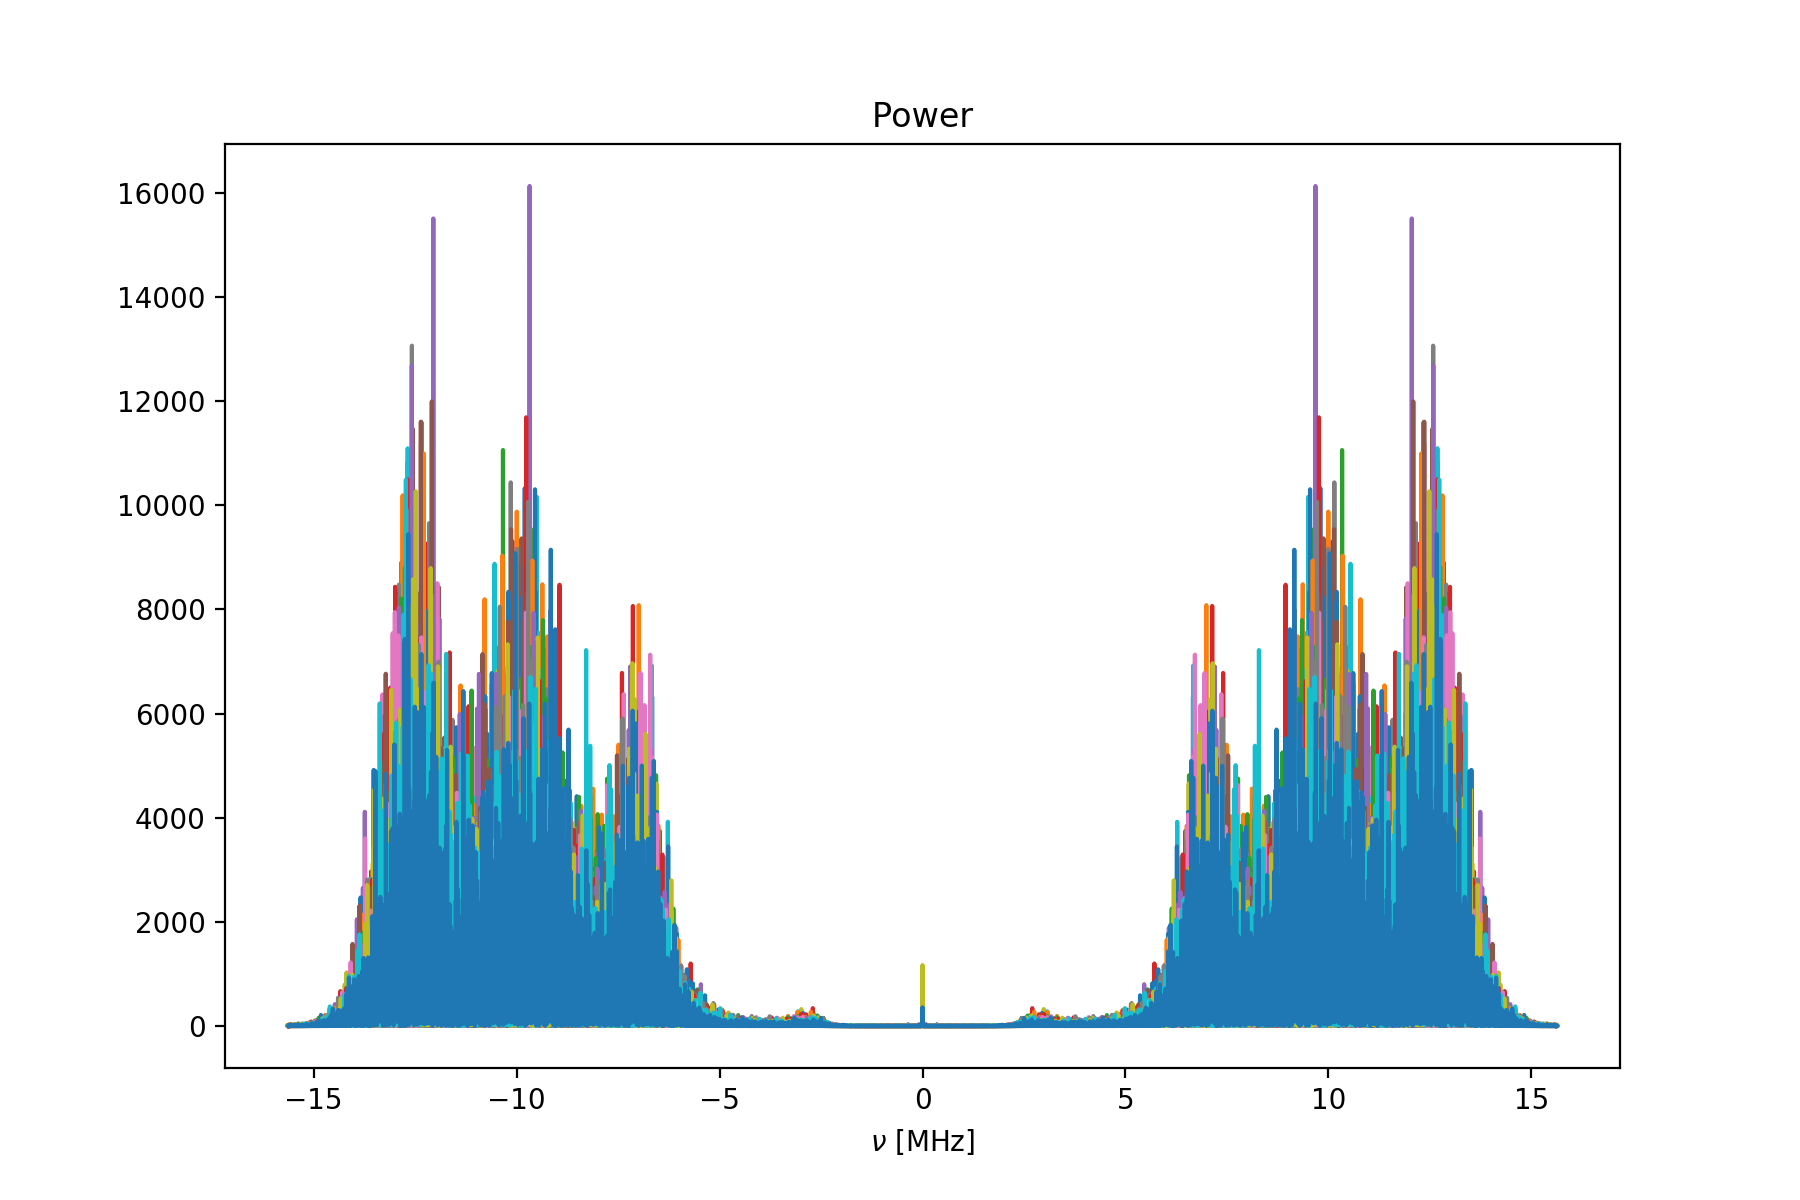

Text(0.5, 0, '$\\nu$ [MHz]')

In [386]:
plt.figure(figsize=(9,6))
plt.title('Power')
for p in power_200mV:
    plt.plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(p))
plt.xlabel(r'$\nu$ [MHz]')

In [367]:
np.arange(1,5)

array([1, 2, 3, 4])

In [368]:
power_mean_200mV = [np.mean(power_200mV[:int(2**n)], axis=0) for n in range(0,6)]
power_mean_500mV = [np.mean(power_500mV[:int(2**n)], axis=0) for n in range(0,6)]



<IPython.core.display.Javascript object>


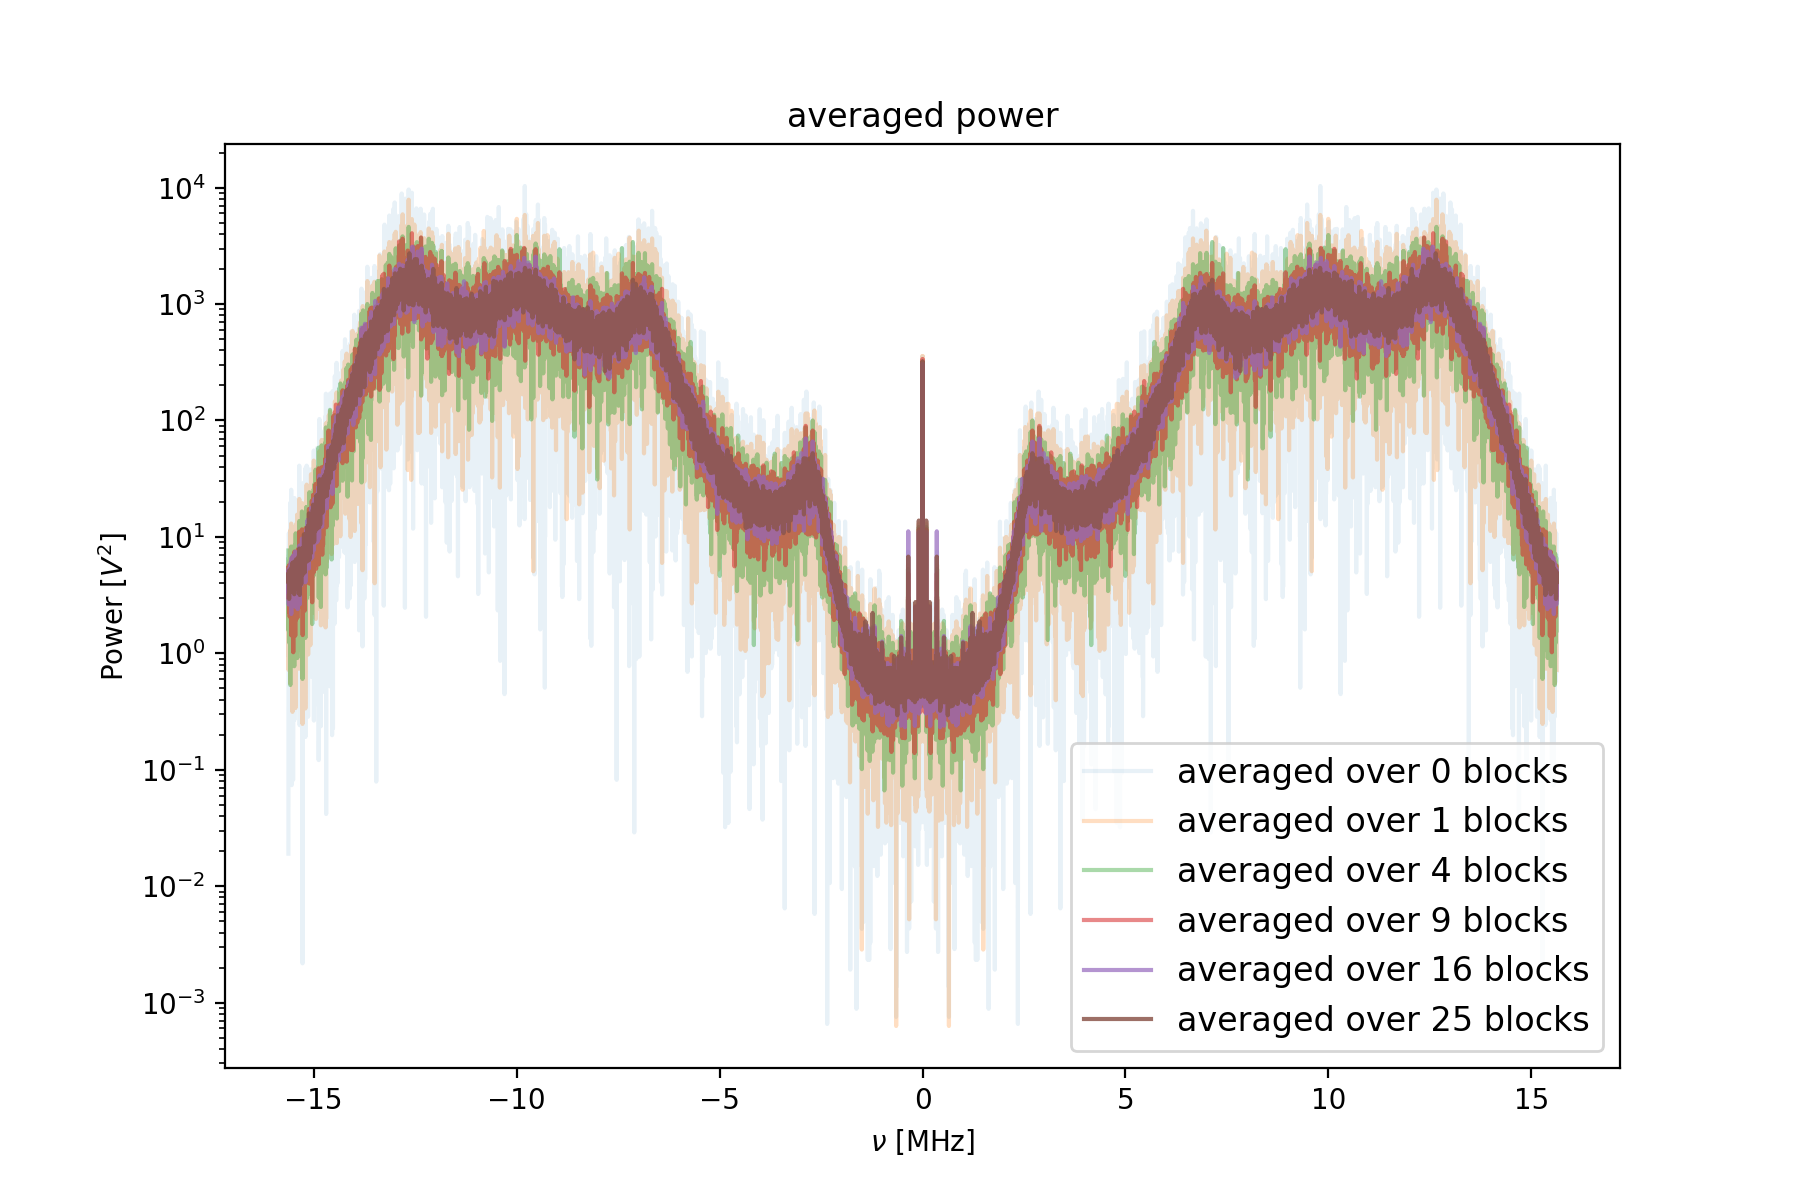

In [383]:
plt.figure(figsize=(9,6))
plt.title('averaged power')
for p, i in zip(power_mean_200mV, np.arange(0,6)):
    plt.semilogy(np.fft.fftshift(freqs/1e6), np.fft.fftshift(p), alpha =.1+i*.15 , label='averaged over ' +str(i**2)+' blocks')
plt.legend(fontsize='large', loc='lower right')
plt.xlabel(r'$\nu$ [MHz]')
plt.ylabel('Power [$V^2$]')
plt.show()

In [384]:
blocks = np.arange(0, 16000 * 32, 16000)
ac_500mV = []
ac_200mV = []
ac_200mV_np = []
ac_500mV_np = []
ac_200mV_sp = []
ac_500mV_sp = []

for i in range(32):
    if i == 0:
        continue
    elif i == 1:
        ac_500mV.append(np.fft.fft(n_data[0][:blocks[i]])*np.conj(np.fft.fft(n_data[0][:blocks[i]])))
        ac_200mV.append(np.fft.fft(n_data[1][:blocks[i]])*np.conj(np.fft.fft(n_data[1][:blocks[i]])))
        ac_200mV_np.append(np.correlate(n_data[1][:blocks[i]], n_data[1][:blocks[i]], mode='same'))
        ac_500mV_np.append(np.correlate(n_data[0][:blocks[i]], n_data[0][:blocks[i]], mode='same'))
        ac_200mV_sp.append(correlate(n_data[1][:blocks[i]], n_data[1][:blocks[i]], mode='same'))
        ac_500mV_sp.append(correlate(n_data[0][:blocks[i]], n_data[0][:blocks[i]], mode='same'))

    else:
        ac_500mV.append(np.fft.fft(n_data[0][blocks[i-1]:blocks[i]])*np.conj(np.fft.fft(n_data[0][blocks[i-1]:blocks[i]])))
        ac_200mV.append(np.fft.fft(n_data[1][blocks[i-1]:blocks[i]])*np.conj(np.fft.fft(n_data[1][blocks[i-1]:blocks[i]])))
        ac_200mV_np.append(np.correlate(n_data[1][blocks[i-1]:blocks[i]], n_data[1][blocks[i-1]:blocks[i]], mode='same'))
        ac_500mV_np.append(np.correlate(n_data[0][blocks[i-1]:blocks[i]], n_data[0][blocks[i-1]:blocks[i]], mode='same'))
        ac_200mV_sp.append(correlate(n_data[1][blocks[i-1]:blocks[i]], n_data[1][blocks[i-1]:blocks[i]], mode='same'))
        ac_500mV_sp.append(correlate(n_data[0][blocks[i-1]:blocks[i]], n_data[0][blocks[i-1]:blocks[i]], mode='same'))

p_2 = [np.fft.ifft(ac) for ac in ac_200mV]
p_5 = [np.fft.ifft(ac) for ac in ac_200mV]

<ipython-input-384-58872975938b>:17: DeprecationWarning: scipy.correlate is deprecated and will be removed in SciPy 2.0.0, use numpy.correlate instead
  ac_200mV_sp.append(correlate(n_data[1][:blocks[i]], n_data[1][:blocks[i]], mode='same'))
<ipython-input-384-58872975938b>:18: DeprecationWarning: scipy.correlate is deprecated and will be removed in SciPy 2.0.0, use numpy.correlate instead
  ac_500mV_sp.append(correlate(n_data[0][:blocks[i]], n_data[0][:blocks[i]], mode='same'))
<ipython-input-384-58872975938b>:25: DeprecationWarning: scipy.correlate is deprecated and will be removed in SciPy 2.0.0, use numpy.correlate instead
  ac_200mV_sp.append(correlate(n_data[1][blocks[i-1]:blocks[i]], n_data[1][blocks[i-1]:blocks[i]], mode='same'))
<ipython-input-384-58872975938b>:26: DeprecationWarning: scipy.correlate is deprecated and will be removed in SciPy 2.0.0, use numpy.correlate instead
  ac_500mV_sp.append(correlate(n_data[0][blocks[i-1]:blocks[i]], n_data[0][blocks[i-1]:blocks[i]], mo

<IPython.core.display.Javascript object>


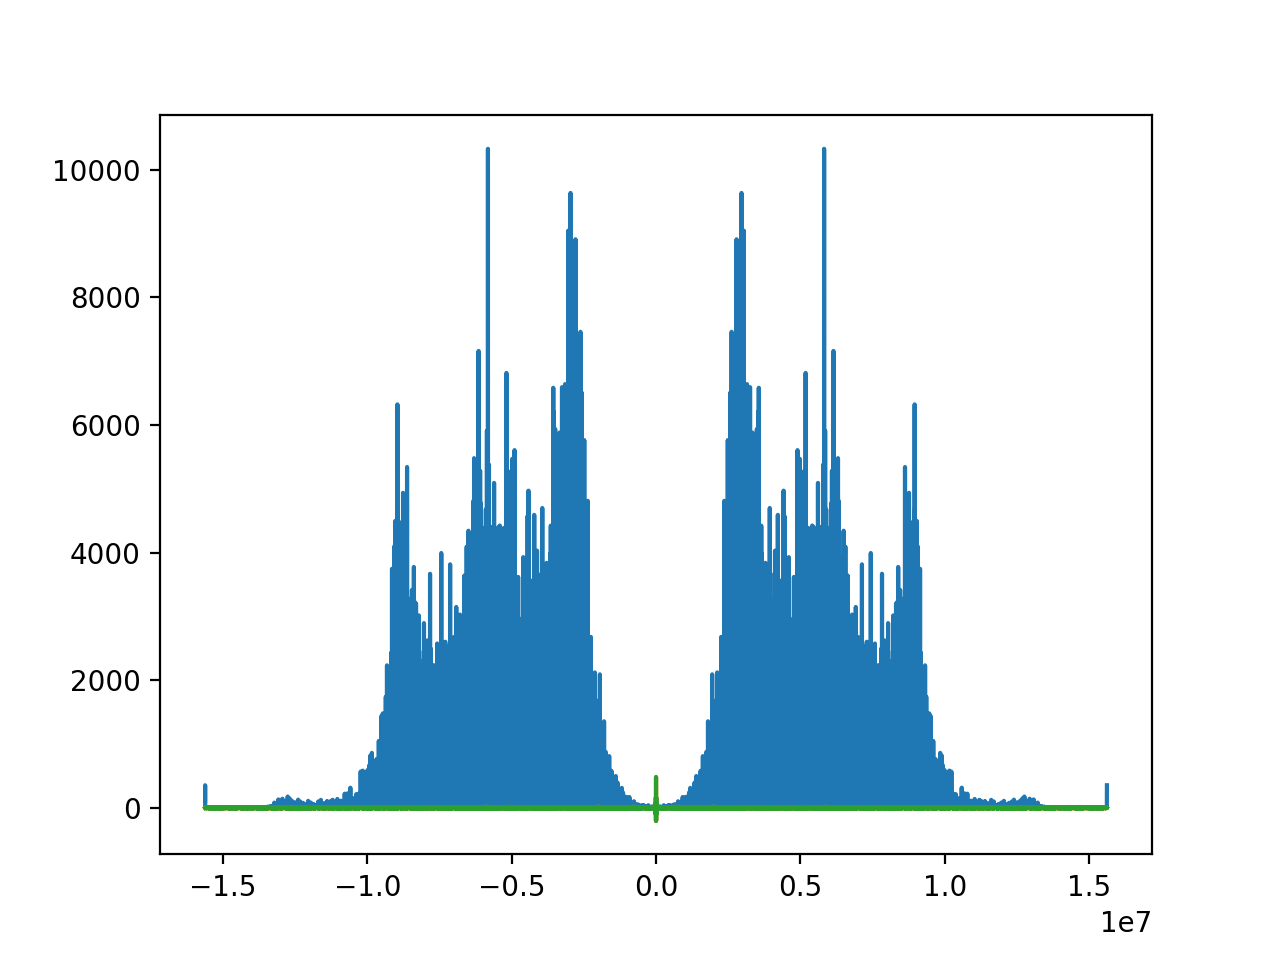

/Users/maxlee/anaconda3/envs/radio_lab/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [385]:
plt.figure()
plt.plot(np.fft.fftshift(freqs), ac_200mV[0])
plt.plot(np.fft.fftshift(freqs), ac_200mV_np[0])
plt.plot(np.fft.fftshift(freqs), ac_200mV_sp[0])

